In [13]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [14]:
import numpy as np
import pandas as pd
from datetime import datetime, date, time, timedelta

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
session.query(Measurement).first().__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x119e38a58>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'id': 1,
 'tobs': 65.0,
 'date': '2010-01-01'}

In [10]:
session.query(Station).first().__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x119e760f0>,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1}

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.

recent_date = session.query(Measurement.date).order_by(desc(Measurement.date)).first().date
print(recent_date)

2017-08-23


In [16]:
recent_date_dt = datetime.strptime(recent_date, "%Y-%m-%d")
print(recent_date_dt)

2017-08-23 00:00:00


In [17]:
# Calculate the date one year from the last date in data set.

time_delta = recent_date_dt - timedelta(days=366)
time_delta

datetime.datetime(2016, 8, 22, 0, 0)

In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Perform a query to retrieve the data and precipitation scores

query = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= time_delta).order_by(Measurement.date.asc()).all()

In [19]:
# Save the query results as a Pandas DataFrame and set the index to the date column

hawaii_df = pd.DataFrame(query, columns=['Date', 'Precipitation'])
rainfall_df = hawaii_df.set_index('Date')
rainfall_df = rainfall_df.dropna()
rainfall_df

# Sort the dataframe by date


,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


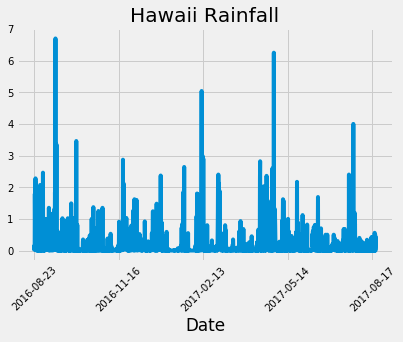

In [20]:
# Use Pandas Plotting with Matplotlib to plot the data
fig = rainfall_df.plot(kind='line', fontsize=10, rot=45, legend=None, title='Hawaii Rainfall')

In [22]:
# Use Pandas to calcualte the summary statistics for the precipitation data
rainfall_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [41]:
# Design a query to calculate the total number stations in the dataset

session.query(Station.station).count()

9

In [43]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

f_count = func.count(Measurement.station)
most_active = session.query(Measurement.station, f_count).\
    group_by(Measurement.station).\
    order_by(f_count.desc()).all()
most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [78]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

ma_station = most_active[0][0]
hi_temp = func.max(Measurement.tobs)
lo_temp = func.min(Measurement.tobs)
av_temp = func.avg(Measurement.tobs)

session.query(lo_temp, hi_temp, av_temp).\
    filter(Measurement.station == ma_station).all()

[(54.0, 85.0, 71.66378066378067)]

In [79]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_temps = session.query(Measurement.tobs).\
    order_by(Measurement.tobs).\
    filter(Measurement.date >= time_delta).\
    filter(Measurement.station == ma_station).all()
year_temps

[(59.0),
 (59.0),
 (59.0),
 (60.0),
 (60.0),
 (61.0),
 (62.0),
 (62.0),
 (62.0),
 (62.0),
 (62.0),
 (62.0),
 (63.0),
 (63.0),
 (63.0),
 (63.0),
 (64.0),
 (64.0),
 (64.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (66.0),
 (66.0),
 (66.0),
 (66.0),
 (66.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 

Text(0.5, 0, 'Temperature')

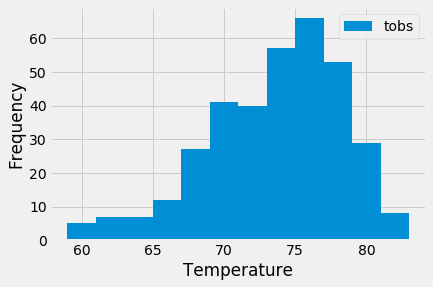

In [100]:
year_temps_df = pd.DataFrame(year_temps)
year_temps_df.plot.hist(bins = 12)
plt.xlabel('Temperature')

# Close session

In [ ]:
# Close Session
session.close()